### Sharpe Ratio Selector (Value Weighted) ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("20250414032739DataExport_stock price last 20.xlsx")
df = df.rename(columns = {
    '代號' : 'ticker',
    '名稱' : 'name',
    '年月' : 'year_month',
    '收盤價(元)_年' : 'closing_price',
    '流通在外股數(千股)' : 'shrout_thou',
    '成交量(百萬股)_年' : 'vol_mil'
}).sort_values(by = ['ticker','year_month']).reset_index(drop = True)
df

,ticker,name,year_month,closing_price,shrout_thou,vol_mil
0,0050,元大台灣50,2004/12,23.79,864000,1690
1,0050,元大台灣50,2005/12,26.18,710000,1670
2,0050,元大台灣50,2006/12,31.71,645000,1218
3,0050,元大台灣50,2007/12,34.98,501000,1710
4,0050,元大台灣50,2008/12,19.83,1187500,4060
...,...,...,...,...,...,...
31452,9962,有益,2020/12,7.98,90220,12
31453,9962,有益,2021/12,14.27,90220,561
31454,9962,有益,2022/12,14.83,90220,330
31455,9962,有益,2023/12,17.17,90220,172


In [4]:
df['return'] = df.groupby('ticker')['closing_price'].pct_change()
df

,ticker,name,year_month,closing_price,shrout_thou,vol_mil,return
0,0050,元大台灣50,2004/12,23.79,864000,1690,NaN
1,0050,元大台灣50,2005/12,26.18,710000,1670,0.100462
2,0050,元大台灣50,2006/12,31.71,645000,1218,0.211230
3,0050,元大台灣50,2007/12,34.98,501000,1710,0.103122
4,0050,元大台灣50,2008/12,19.83,1187500,4060,-0.433105
...,...,...,...,...,...,...,...
31452,9962,有益,2020/12,7.98,90220,12,0.020460
31453,9962,有益,2021/12,14.27,90220,561,0.788221
31454,9962,有益,2022/12,14.83,90220,330,0.039243
31455,9962,有益,2023/12,17.17,90220,172,0.157788


In [5]:
letters_to_exclude = ['G','P','F','Q','C','B','X','Y','L','U','B','S','T','R','O','M','D','I']  # any letters you want to exclude

# Build a regex pattern like '[GWZ]'
pattern = '[' + ''.join(letters_to_exclude) + ']'

# Keep only companies with 10 years
years_per_ticker = df.groupby('ticker')['year_month'].nunique()
tickers_with_10y = years_per_ticker[years_per_ticker >= 10].index 

df_clean = df[(~df['ticker'].str.contains(pattern)) & (df['ticker'].isin(tickers_with_10y))]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28047 entries, 0 to 31456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker         28047 non-null  object 
 1   name           28047 non-null  object 
 2   year_month     28047 non-null  object 
 3   closing_price  28047 non-null  float64
 4   shrout_thou    28047 non-null  int64  
 5   vol_mil        28047 non-null  int64  
 6   return         26552 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB


In [6]:
df_ticker_name = df_clean[['ticker', 'name']].drop_duplicates('ticker').reset_index(drop = True)
df_descriptive = df_ticker_name.merge(df_clean.groupby('ticker')['return'].mean(), how = 'left', on = 'ticker')
df_descriptive

,ticker,name,return
0,0050,元大台灣50,0.139336
1,0051,元大中型100,0.125352
2,0052,富邦科技,0.179660
3,0053,元大電子,0.163205
4,0055,元大MSCI金融,0.097774
...,...,...,...
1490,9951,皇田,0.273341
1491,9955,佳龍,0.101154
1492,9958,世紀鋼,0.403945
1493,9960,邁達康,0.193116


In [7]:
# Calculate value traded
df_clean['trade_val_mil'] = df_clean['vol_mil'] * df_clean['closing_price']
df_clean

C:\Users\user\AppData\Local\Temp\ipykernel_9392\3714812540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['trade_val_mil'] = df_clean['vol_mil'] * df_clean['closing_price']


,ticker,name,year_month,closing_price,shrout_thou,vol_mil,return,trade_val_mil
0,0050,元大台灣50,2004/12,23.79,864000,1690,NaN,40205.10
1,0050,元大台灣50,2005/12,26.18,710000,1670,0.100462,43720.60
2,0050,元大台灣50,2006/12,31.71,645000,1218,0.211230,38622.78
3,0050,元大台灣50,2007/12,34.98,501000,1710,0.103122,59815.80
4,0050,元大台灣50,2008/12,19.83,1187500,4060,-0.433105,80509.80
...,...,...,...,...,...,...,...,...
31452,9962,有益,2020/12,7.98,90220,12,0.020460,95.76
31453,9962,有益,2021/12,14.27,90220,561,0.788221,8005.47
31454,9962,有益,2022/12,14.83,90220,330,0.039243,4893.90
31455,9962,有益,2023/12,17.17,90220,172,0.157788,2953.24


In [8]:
df_clean.groupby('ticker')['vol_mil'].mean() *1000 / df_clean.groupby('ticker')['shrout_thou'].mean()

ticker
0050    2.156858
0051    1.654346
0052    2.155642
0053    0.821161
0055    2.740831
          ...   
9951    1.157979
9955    2.049076
9958    3.830738
9960    0.670078
9962    1.249774
Length: 1495, dtype: float64

In [9]:
# Calculate average traded value
df_avg_trade_val = df_clean.groupby('ticker')['trade_val_mil'].mean()
df_avg_trade_val.name = 'avg_trade_val'

# Calculate turnover
df_turnover = df_clean.groupby('ticker')['vol_mil'].mean() *1000 / df_clean.groupby('ticker')['shrout_thou'].mean()
df_turnover.name = 'turnover'

# Calculate std
df_std = df_clean.groupby('ticker')['return'].std()
df_std.name = 'std'

df_descriptive = df_descriptive.merge(df_avg_trade_val, how = 'left', on = 'ticker')
df_descriptive = df_descriptive.merge(df_turnover, how = 'left', on = 'ticker')
df_descriptive = df_descriptive.merge(df_std, how = 'left', on = 'ticker')
df_descriptive

,ticker,name,return,avg_trade_val,turnover,std
0,0050,元大台灣50,0.139336,162602.600476,2.156858,0.253197
1,0051,元大中型100,0.125352,966.020526,1.654346,0.317281
2,0052,富邦科技,0.179660,5713.379474,2.155642,0.333584
3,0053,元大電子,0.163205,385.370556,0.821161,0.342818
4,0055,元大MSCI金融,0.097774,3159.544444,2.740831,0.217597
...,...,...,...,...,...,...
1490,9951,皇田,0.273341,5024.360476,1.157979,0.831696
1491,9955,佳龍,0.101154,5870.490000,2.049076,0.407071
1492,9958,世紀鋼,0.403945,67987.535294,3.830738,0.690463
1493,9960,邁達康,0.193116,299.953333,0.670078,0.676485


In [10]:
df_descriptive['s_ratio'] = (df_descriptive['return'] - 0.02) / df_descriptive['std']
df_descriptive

,ticker,name,return,avg_trade_val,turnover,std,s_ratio
0,0050,元大台灣50,0.139336,162602.600476,2.156858,0.253197,0.471318
1,0051,元大中型100,0.125352,966.020526,1.654346,0.317281,0.332045
2,0052,富邦科技,0.179660,5713.379474,2.155642,0.333584,0.478621
3,0053,元大電子,0.163205,385.370556,0.821161,0.342818,0.417730
4,0055,元大MSCI金融,0.097774,3159.544444,2.740831,0.217597,0.357423
...,...,...,...,...,...,...,...
1490,9951,皇田,0.273341,5024.360476,1.157979,0.831696,0.304607
1491,9955,佳龍,0.101154,5870.490000,2.049076,0.407071,0.199360
1492,9958,世紀鋼,0.403945,67987.535294,3.830738,0.690463,0.556069
1493,9960,邁達康,0.193116,299.953333,0.670078,0.676485,0.255905


In [11]:
# Screen for liquidity
df_descriptive = df_descriptive[~((df_descriptive['turnover'] <= 1) & (df_descriptive['avg_trade_val'] <= 100000))].sort_values(by = 's_ratio', ascending = False).head(10)
df_descriptive

,ticker,name,return,avg_trade_val,turnover,std,s_ratio
365,2412,中華電,0.085743,1.696696e+05,0.329293,0.063437,1.036355
1010,5274,信驊,0.457987,1.213852e+05,2.159968,0.471324,0.929269
311,2330,台積電,0.245230,2.105318e+06,0.417310,0.275073,0.818801
9,006203,元大MSCI台灣,0.158592,7.117614e+02,1.356492,0.187255,0.740127
10,006204,永豐臺灣加權,0.140999,9.735050e+02,3.853659,0.163546,0.739848
14,006208,富邦台50,0.165896,3.347139e+04,1.391092,0.197963,0.736984
1361,8147,正淩,0.224368,4.699926e+03,2.198753,0.282137,0.724357
1221,6221,晉泰,0.266402,4.860286e+02,1.165106,0.352618,0.698780
1016,5288,豐祥-KY,0.194722,6.578285e+03,1.202019,0.255052,0.685044
826,3706,神達,0.206697,8.428248e+04,2.072545,0.281253,0.663804


#### Build a portfolio consisting of top 5 stocks by value weighting them
##### Use the closing market cap of the previous year for the weight of the next year
i.e. If TSMC closes in 2004 with 5 mil market cap, and my total cash is 10 mil, it will get 50% weight starting 2011

In [13]:
# Calculate market cap
df_clean = df_clean.copy()
df_clean['market_cap_mil'] = df_clean['shrout_thou'] * df_clean['closing_price'] / 1000
df_clean

,ticker,name,year_month,closing_price,shrout_thou,vol_mil,return,trade_val_mil,market_cap_mil
0,0050,元大台灣50,2004/12,23.79,864000,1690,NaN,40205.10,20554.5600
1,0050,元大台灣50,2005/12,26.18,710000,1670,0.100462,43720.60,18587.8000
2,0050,元大台灣50,2006/12,31.71,645000,1218,0.211230,38622.78,20452.9500
3,0050,元大台灣50,2007/12,34.98,501000,1710,0.103122,59815.80,17524.9800
4,0050,元大台灣50,2008/12,19.83,1187500,4060,-0.433105,80509.80,23548.1250
...,...,...,...,...,...,...,...,...,...
31452,9962,有益,2020/12,7.98,90220,12,0.020460,95.76,719.9556
31453,9962,有益,2021/12,14.27,90220,561,0.788221,8005.47,1287.4394
31454,9962,有益,2022/12,14.83,90220,330,0.039243,4893.90,1337.9626
31455,9962,有益,2023/12,17.17,90220,172,0.157788,2953.24,1549.0774


In [14]:
# Get the lagged market cap for weight calculation
df_clean['year'] = df_clean['year_month'].str[:4].astype(int)
df_clean['market_cap_lag'] = df_clean.groupby('ticker')['market_cap_mil'].shift(1)
df_clean

,ticker,name,year_month,closing_price,shrout_thou,vol_mil,return,trade_val_mil,market_cap_mil,year,market_cap_lag
0,0050,元大台灣50,2004/12,23.79,864000,1690,NaN,40205.10,20554.5600,2004,NaN
1,0050,元大台灣50,2005/12,26.18,710000,1670,0.100462,43720.60,18587.8000,2005,20554.5600
2,0050,元大台灣50,2006/12,31.71,645000,1218,0.211230,38622.78,20452.9500,2006,18587.8000
3,0050,元大台灣50,2007/12,34.98,501000,1710,0.103122,59815.80,17524.9800,2007,20452.9500
4,0050,元大台灣50,2008/12,19.83,1187500,4060,-0.433105,80509.80,23548.1250,2008,17524.9800
...,...,...,...,...,...,...,...,...,...,...,...
31452,9962,有益,2020/12,7.98,90220,12,0.020460,95.76,719.9556,2020,705.5204
31453,9962,有益,2021/12,14.27,90220,561,0.788221,8005.47,1287.4394,2021,719.9556
31454,9962,有益,2022/12,14.83,90220,330,0.039243,4893.90,1337.9626,2022,1287.4394
31455,9962,有益,2023/12,17.17,90220,172,0.157788,2953.24,1549.0774,2023,1337.9626


In [15]:
top_5_tickers = df_descriptive.sort_values('s_ratio', ascending=False).head(5)['ticker'].tolist()

# Filter only top 5
df_portfolio = df_clean[df_clean['ticker'].isin(top_5_tickers)]

# Normalize lagged market cap into weights
df_portfolio['weight'] = df_portfolio.groupby('year')['market_cap_lag'].transform(lambda x: x / x.sum())

df_portfolio

C:\Users\user\AppData\Local\Temp\ipykernel_9392\1842131583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portfolio['weight'] = df_portfolio.groupby('year')['market_cap_lag'].transform(lambda x: x / x.sum())


,ticker,name,year_month,closing_price,shrout_thou,vol_mil,return,trade_val_mil,market_cap_mil,year,market_cap_lag,weight
160,006203,元大MSCI台灣,2011/12,15.77,19218,107,NaN,1687.39,303.06786,2011,NaN,NaN
161,006203,元大MSCI台灣,2012/12,17.90,21218,5,0.135067,89.50,379.80220,2012,303.06786,0.000171
162,006203,元大MSCI台灣,2013/12,20.10,176218,6,0.122905,120.60,3541.98180,2013,379.80220,0.000171
163,006203,元大MSCI台灣,2014/12,23.22,9718,301,0.155224,6989.22,225.65196,2014,3541.98180,0.001445
164,006203,元大MSCI台灣,2015/12,21.44,12218,5,-0.076658,107.20,261.95392,2015,225.65196,0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...
20946,5274,信驊,2020/12,1485.99,34320,100,0.819216,148599.00,50999.17680,2020,27922.51672,0.003313
20947,5274,信驊,2021/12,3126.07,34369,50,1.103695,156303.50,107439.89983,2021,50999.17680,0.003793
20948,5274,信驊,2022/12,1649.71,37821,128,-0.472273,211162.88,62393.68191,2022,107439.89983,0.006770
20949,5274,信驊,2023/12,3106.92,37821,123,0.883313,382151.16,117506.82132,2023,62393.68191,0.005190


In [16]:
print(df_portfolio['name'].unique())

['元大MSCI台灣' '永豐臺灣加權' '台積電' '中華電' '信驊']


In [17]:
df_portfolio['wgt_return'] = df_portfolio['return'] * df_portfolio['weight']

# Portfolio return per year
portfolio_return = df_portfolio.groupby('year')['wgt_return'].sum().reset_index(name='portfolio_return')

portfolio_return

C:\Users\user\AppData\Local\Temp\ipykernel_9392\2575200826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portfolio['wgt_return'] = df_portfolio['return'] * df_portfolio['weight']


,year,portfolio_return
0,2004,0.000000
1,2005,0.238865
2,2006,0.173877
3,2007,0.019396
4,2008,-0.145879
5,2009,0.382648
6,2010,0.176161
7,2011,0.129178
8,2012,0.247733
9,2013,0.102974


In [18]:
portfolio_return['cum_return'] = (1 + portfolio_return['portfolio_return']).cumprod()
portfolio_return['volatility'] = df_portfolio.groupby('year')['wgt_return'].std().values  # annual std

# Sharpe (use your risk-free rate if needed)
portfolio_return['sharpe'] = (portfolio_return['portfolio_return'] - 0.02) / portfolio_return['volatility']

portfolio_return

,year,portfolio_return,cum_return,volatility,sharpe
0,2004,0.000000,1.000000,NaN,NaN
1,2005,0.238865,1.238865,0.176643,1.239024
2,2006,0.173877,1.454275,0.063442,2.425468
3,2007,0.019396,1.482482,0.035640,-0.016952
4,2008,-0.145879,1.266219,0.132125,-1.255466
5,2009,0.382648,1.750736,0.207069,1.751339
6,2010,0.176161,2.059147,0.034013,4.591226
7,2011,0.129178,2.325144,0.024844,4.394482
8,2012,0.247733,2.901158,0.123275,1.847359
9,2013,0.102974,3.199903,0.046207,1.795710


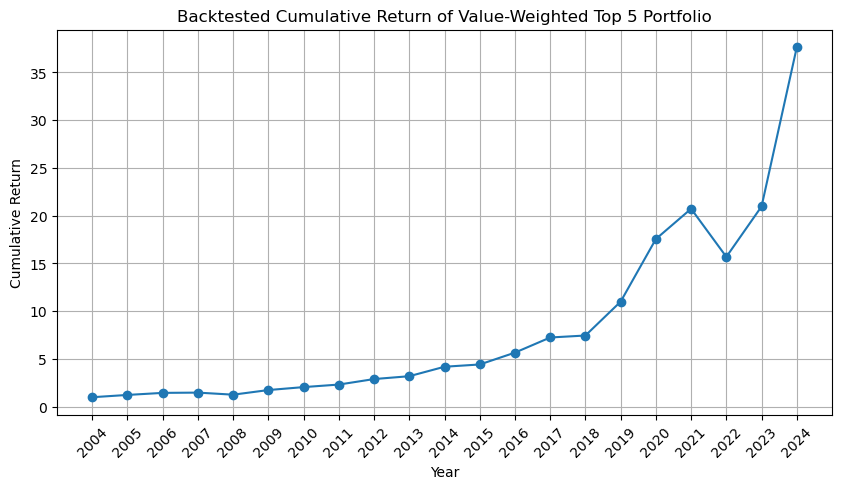

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(portfolio_return['year'], portfolio_return['cum_return'], marker='o')
plt.title('Backtested Cumulative Return of Value-Weighted Top 5 Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.grid(True)

# Force x-axis ticks to be integers
years = portfolio_return['year'].astype(int)
plt.xticks(np.arange(years.min(), years.max() + 1, 1), rotation=45)  # one tick per year

plt.show()

In [20]:
df_market = df_clean[['return','year']][df_clean['ticker'] == '0050']
df_market = df_market.rename(columns = {'return' : 'mkt_return'})

portfolio_return = portfolio_return.merge(df_market, on = 'year', how = 'left')
portfolio_return['mkt_cum_return'] = (1 + portfolio_return['mkt_return']).cumprod()

portfolio_return.fillna(0, inplace=True)  # Optional, if you want to show 0

portfolio_return

,year,portfolio_return,cum_return,volatility,sharpe,mkt_return,mkt_cum_return
0,2004,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,2005,0.238865,1.238865,0.176643,1.239024,0.100462,1.100462
2,2006,0.173877,1.454275,0.063442,2.425468,0.211230,1.332913
3,2007,0.019396,1.482482,0.035640,-0.016952,0.103122,1.470366
4,2008,-0.145879,1.266219,0.132125,-1.255466,-0.433105,0.833544
5,2009,0.382648,1.750736,0.207069,1.751339,0.749874,1.458596
6,2010,0.176161,2.059147,0.034013,4.591226,0.131412,1.650273
7,2011,0.129178,2.325144,0.024844,4.394482,-0.158176,1.389239
8,2012,0.247733,2.901158,0.123275,1.847359,0.119213,1.554855
9,2013,0.102974,3.199903,0.046207,1.795710,0.116788,1.736444


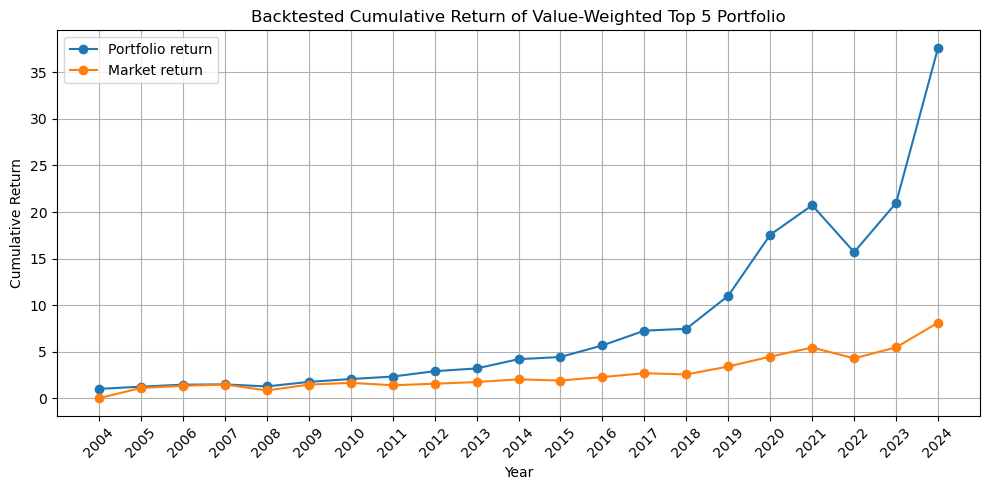

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(portfolio_return['year'], portfolio_return['cum_return'], marker='o')
plt.plot(portfolio_return['year'], portfolio_return['mkt_cum_return'], marker='o')
plt.title('Backtested Cumulative Return of Value-Weighted Top 5 Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(['Portfolio return', 'Market return'])

# Force x-axis ticks to be integers
years = portfolio_return['year'].astype(int)
plt.xticks(np.arange(years.min(), years.max() + 1, 1), rotation=45)  # one tick per year
plt.tight_layout()

plt.show()